# Convergence Analysis

Deep dive into convergence behavior:
1. Learning rate effects
2. Convergence criteria
3. Learning rate schedules
4. Momentum

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
np.random.seed(42)

# Setup data
m = 100
X = 2 * np.random.rand(m, 1)
y = 5 + 3 * X + np.random.randn(m, 1)
X_b = np.c_[np.ones((m, 1)), X]

def compute_cost(X, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((X.dot(theta) - y)**2)


---
## Analysis 1: Learning Rate Impact

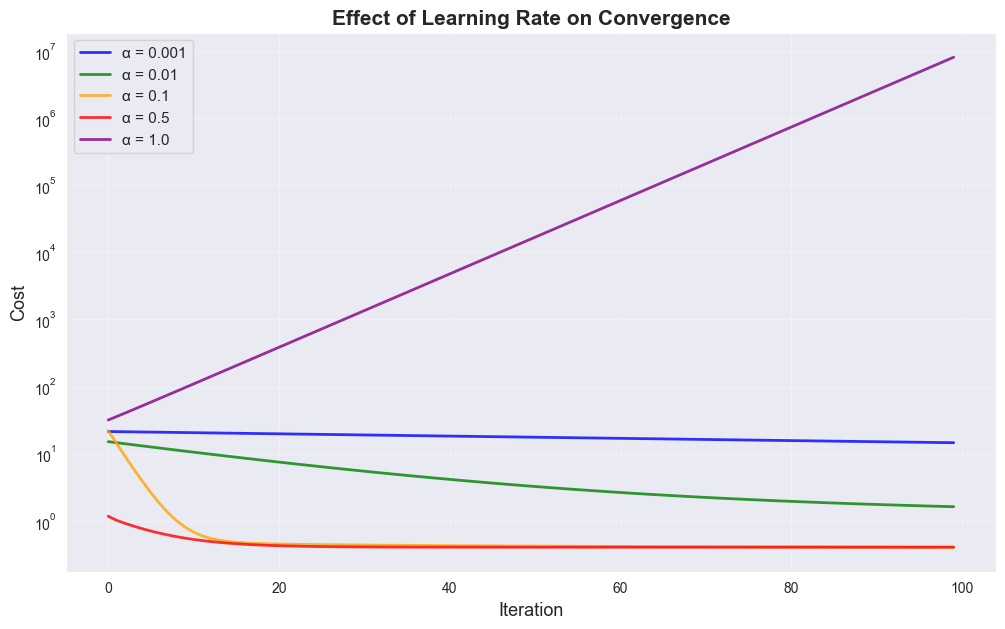

In [2]:
def gd_with_lr(X, y, lr, n_iter=100):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    costs = []
    
    for _ in range(n_iter):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - lr * gradients
        costs.append(compute_cost(X, y, theta))
    
    return theta, costs

# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
colors = ['blue', 'green', 'orange', 'red', 'purple']

plt.figure(figsize=(12, 7))
for lr, color in zip(learning_rates, colors):
    _, costs = gd_with_lr(X_b, y, lr, n_iter=100)
    plt.plot(costs, linewidth=2, color=color, label=f'α = {lr}', alpha=0.8)

plt.xlabel('Iteration', fontsize=13)
plt.ylabel('Cost', fontsize=13)
plt.title('Effect of Learning Rate on Convergence', fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale to see all curves
plt.show()


### Observation

- **α = 0.001**: Too small, very slow
- **α = 0.01**: Slow but steady
- **α = 0.1**: Good convergence
- **α = 0.5**: Fast but may oscillate
- **α = 1.0**: Too large, diverges!

---
## Analysis 2: Convergence Criteria

Converged at iteration 263


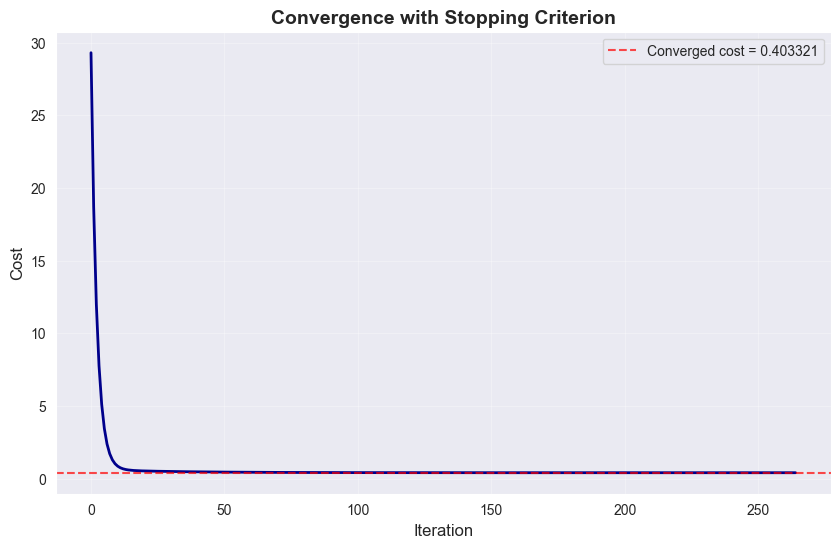

Total iterations: 265
Final θ: [5.20142508 2.78218421]


In [3]:
def gd_with_criteria(X, y, lr=0.1, tolerance=1e-6, max_iter=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    costs = [compute_cost(X, y, theta)]
    
    for iteration in range(max_iter):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - lr * gradients
        cost = compute_cost(X, y, theta)
        costs.append(cost)
        
        # Check convergence
        if abs(costs[-1] - costs[-2]) < tolerance:
            print(f'Converged at iteration {iteration}')
            break
    
    return theta, costs

theta_conv, costs_conv = gd_with_criteria(X_b, y, tolerance=1e-6)

plt.figure(figsize=(10, 6))
plt.plot(costs_conv, linewidth=2, color='darkblue')
plt.axhline(y=costs_conv[-1], color='red', linestyle='--', 
           label=f'Converged cost = {costs_conv[-1]:.6f}', alpha=0.7)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Convergence with Stopping Criterion', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f'Total iterations: {len(costs_conv)}')
print(f'Final θ: {theta_conv.ravel()}')


---
## Analysis 3: Learning Rate Schedule

Decrease learning rate over time for better convergence.

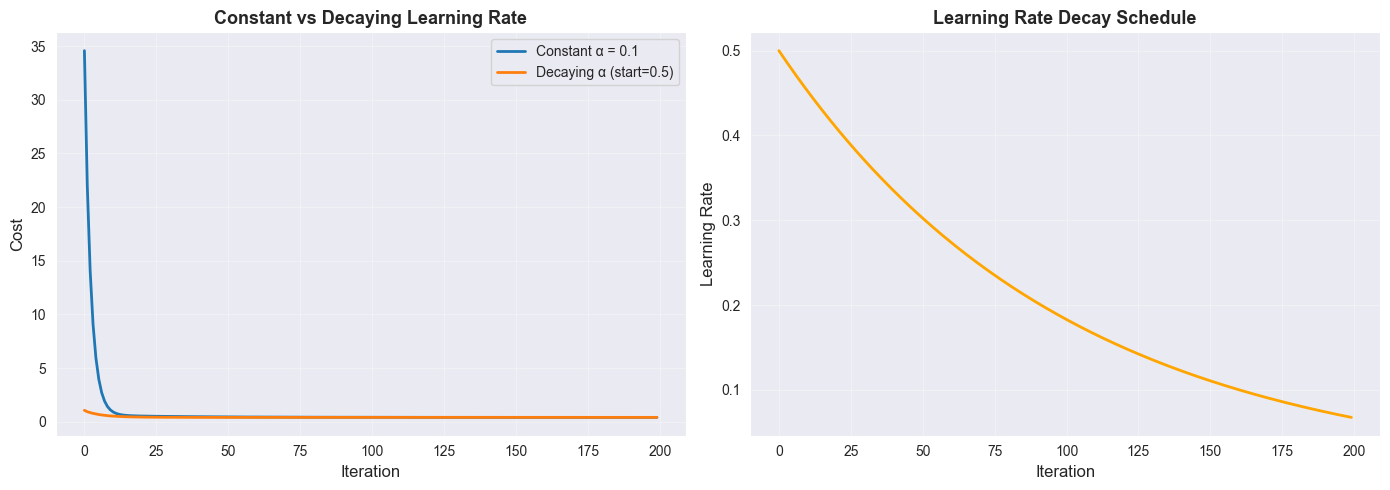

In [4]:
def gd_with_schedule(X, y, lr_initial=0.5, decay=0.99, n_iter=200):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    costs = []
    learning_rates = []
    
    lr = lr_initial
    for iteration in range(n_iter):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - lr * gradients
        costs.append(compute_cost(X, y, theta))
        learning_rates.append(lr)
        
        # Decay learning rate
        lr = lr * decay
    
    return theta, costs, learning_rates

# Compare constant vs decaying learning rate
_, costs_const = gd_with_lr(X_b, y, lr=0.1, n_iter=200)
_, costs_decay, lrs = gd_with_schedule(X_b, y, lr_initial=0.5, decay=0.99, n_iter=200)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Cost comparison
axes[0].plot(costs_const, linewidth=2, label='Constant α = 0.1')
axes[0].plot(costs_decay, linewidth=2, label='Decaying α (start=0.5)')
axes[0].set_xlabel('Iteration', fontsize=12)
axes[0].set_ylabel('Cost', fontsize=12)
axes[0].set_title('Constant vs Decaying Learning Rate', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Learning rate over time
axes[1].plot(lrs, linewidth=2, color='orange')
axes[1].set_xlabel('Iteration', fontsize=12)
axes[1].set_ylabel('Learning Rate', fontsize=12)
axes[1].set_title('Learning Rate Decay Schedule', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Benefit of Learning Rate Decay

- Start with large steps (fast initial progress)
- Gradually decrease (fine-tune near minimum)
- Best of both worlds!

---
## Analysis 4: Momentum

Add momentum to accelerate convergence and dampen oscillations.

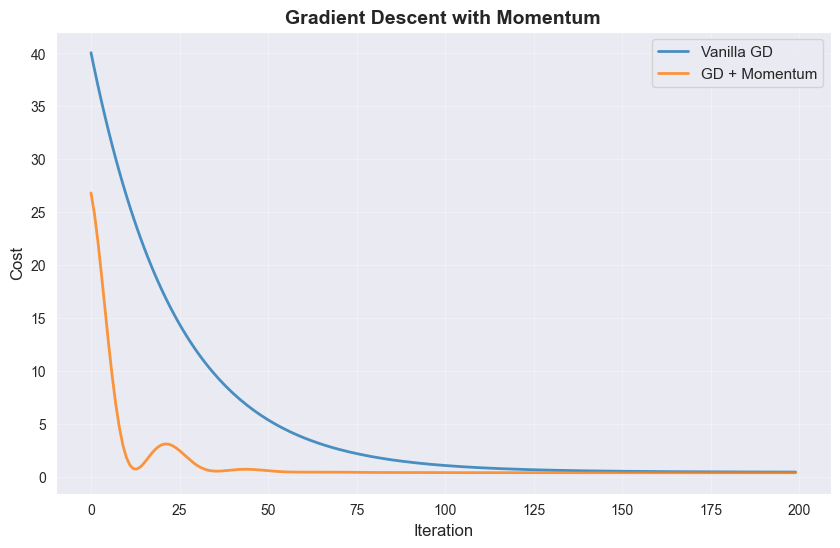

Vanilla GD final cost:   0.46426192
GD + Momentum final cost: 0.40343809


In [5]:
def gd_with_momentum(X, y, lr=0.01, momentum=0.9, n_iter=200):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    velocity = np.zeros_like(theta)
    costs = []
    
    for _ in range(n_iter):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        
        # Update velocity
        velocity = momentum * velocity + lr * gradients
        
        # Update theta
        theta = theta - velocity
        
        costs.append(compute_cost(X, y, theta))
    
    return theta, costs

# Compare vanilla GD vs with momentum
_, costs_vanilla = gd_with_lr(X_b, y, lr=0.01, n_iter=200)
_, costs_momentum = gd_with_momentum(X_b, y, lr=0.01, momentum=0.9, n_iter=200)

plt.figure(figsize=(10, 6))
plt.plot(costs_vanilla, linewidth=2, label='Vanilla GD', alpha=0.8)
plt.plot(costs_momentum, linewidth=2, label='GD + Momentum', alpha=0.8)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Gradient Descent with Momentum', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print(f'Vanilla GD final cost:   {costs_vanilla[-1]:.8f}')
print(f'GD + Momentum final cost: {costs_momentum[-1]:.8f}')


### Momentum Benefits

- Faster convergence (accumulates gradients in consistent directions)
- Dampens oscillations
- Can escape shallow local minima
- Standard in deep learning (β typically 0.9)

---
## Summary: Convergence Best Practices

### 1. Choose Learning Rate Carefully
- Start with 0.01 or 0.1
- Monitor cost - should decrease smoothly
- Use grid search or adaptive methods

### 2. Use Convergence Criteria
- Don't rely only on fixed iterations
- Check cost change: $|J^{(t)} - J^{(t-1)}| < \epsilon$
- Combine with max iterations as safety

### 3. Consider Learning Rate Schedules
- Step decay: reduce by factor every N epochs
- Exponential decay: $\alpha_t = \alpha_0 e^{-kt}$
- 1/t decay: $\alpha_t = \alpha_0 / (1 + kt)$

### 4. Add Momentum
- Especially helpful for:
  - High-dimensional problems
  - Ill-conditioned problems (ravines)
  - When using SGD/mini-batch

### 5. Modern Approach: Adaptive Optimizers
- Adam (most popular)
- RMSprop
- AdaGrad
- These handle learning rate automatically!

---

**Interview Tip**: "For gradient descent convergence, I'd start with a learning rate of 0.01-0.1, use momentum (0.9), monitor the cost curve, and consider learning rate decay if convergence is slow. For deep learning, I'd use Adam optimizer which handles these details automatically."